# ***Exploratory Data Analysis***

---

## ***Titanic***

- Siniflandirma projesinde Titanic verileriyle calisarak faciada hayatta kalma durumunu tahmin edecegiz. Titanic verileri [Kaggle](https://www.kaggle.com/c/titanic/data)'dan elde edilmisitir. Buradaki ```train.csv``` dosyası kullanilmistir.
- ***Veri Seti:*** Titanic
- ***Arastirma konusu:*** Faciadan kurtulma durumu hedef degisken, diger degiskenler aciklayici degisken olmak uzere faciadan kurtulma durumunu tahmin eden bir model olusturulacaktir.
- Burada titanic verilerinin Kesifsel Veri Analizi yapilmistir. Nihai sonuc dosyasi ```data/titanic_clean.csv``` dosyasina kaydedilmistir, model testleri ve secimi bu dosya uzerinden yapilacaktir.
- Asagida EDA adimlarinin ozet bir listesi verilmistir ve hemen hemen her adim burada uygulanmistir.

## ***Exploratory Data Analysis (EDA) Adimlari*** <a class="anchor" id="eda-adimlari"></a>

- [Veri Kesfi](#veri-kesfi)
    - Degisken Turlerinin Tespiti
    - Degisken Turlerinin Degistirilmesi (surekli -> kategorik  -- optional)
- [Verideki Problemlerin Tespiti](#verideki-problemlerin-tespiti)
    - Eksik Degerlerin Doldurulmasi
    - Aykiri Degerlerin Tespiti ve/veya Giderilmesi
- [Degiskenlerin Analizi](#degiskenlerin-analizi)
    - Tek Degiskenli Analiz (Univariate Analysis)
        - Istatistiki Veriler (describe)
        - Surekli Degiskenlerin Gorsel Analizi 
            - Dagilim Grafigi (histograms, dist plots)
        - Kategorik Degiskenlerin Gorsel Analizi 
            - Sayi Grafigi (count plots)
    - Cok Degiskenli Analiz (Multivariate Analysis)
        - Iki Surekli Degiskenin Iki Degiskenli Analizi
            - Dagilim Grafigi (scatter plots)
            - Korelsayon Matrisi Grafigi (heatmaps)
        - Surekli ve Kategorik Degiskenin Iki Degiskenli Analizi
            - Cubuk Grafigi (bar, swarm, strip, box plots)
        - Iki Kategorik Degiskenin Iki Degiskenli Analizi
            - Sayi Grafigi (count plots)
- [Yeni Degiskenler Elde Etme](#yeni-degiskenler-elde-etme)
    - Anlamsiz Gorunen Degiskenlerden Anlamli Yeni Ozellikler Cikarma
    - Temel Bilsesenler Analizi (Principal Components Analysis - PCA)(Burada uygulanmadi)
- [Degiskenleri Donusturme](#degiskenleri-donusturme)
    - Metin Degeri olan Degiskenlerin Sayisal Degerlere Donusturulmesi
    - Dagilimlari Normallestirme (normalize, log, sqrt)
    - Olceklendirme ve Standartlastirma (normalize, scale)
    - One Hot Encoding (dummy)

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format
# sutunun genisligi
pd.options.display.max_colwidth = 100

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
#survived color codes
mycolors = ['#CB4335','#3498DB']
survive_palette = sns.color_palette(mycolors)

##### [Exploratory Data Analysis (EDA) Adimlari](#eda-adimlari)
---
## ***Veri Kesfi*** <a class="anchor" id="veri-kesfi"></a>

- Degisken Turlerinin Tespiti

In [440]:
# veri setini dataframe icerisine yukle
titanic = pd.read_csv('data/titanic_train.csv')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [441]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [442]:
# unique deger sayilari
type_of_vars = {}
categoric = []
continuous = []
cols_df = pd.DataFrame([])
for col in titanic.columns:
    type_of_vars['col_name'] = col       
    type_of_vars['type'] = 'continuous' if titanic[col].nunique()>20 else 'categoric'
    type_of_vars['n_unique'] = titanic[col].nunique()
    type_of_vars['unique'] = titanic[col].unique()
    cols_df = pd.concat([cols_df,pd.DataFrame([type_of_vars])],)
    cols_df = cols_df.sort_values(by='n_unique')
    continuous.append(col) if titanic[col].nunique()>20 else categoric.append(col)
pd.set_option('display.max_colwidth', 200)
display(cols_df)

,col_name,type,n_unique,unique
0,Survived,categoric,2,"[0, 1]"
0,Sex,categoric,2,"[male, female]"
0,Pclass,categoric,3,"[3, 1, 2]"
0,Embarked,categoric,3,"[S, C, Q, nan]"
0,SibSp,categoric,7,"[1, 0, 3, 4, 2, 5, 8]"
0,Parch,categoric,7,"[0, 1, 2, 5, 3, 4, 6]"
0,Age,continuous,88,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0, 40.0, 66.0, 42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5, 5.0, 11.0, 45.0..."
0,Cabin,continuous,147,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C25 C27, B78, D33, B30, C52, B28, C83, F33, F G73, E31, A5, D10 D12, D26, C110, B58 B60, E101, F E69, D47, B86, F2, C2, E33, B19, A7, C49, F4, A32, B4,..."
0,Fare,continuous,248,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 31.275, 7.8542, 16.0, 29.125, 13.0, 18.0, 7.225, 26.0, 8.0292, 35.5, 31.3875, 263.0, 7.8792, 7.8958, 27.7..."
0,Ticket,continuous,681,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, 330877, 17463, 349909, 347742, 237736, PP 9549, 113783, A/5. 2151, 347082, 350406, 248706, 382652, 244373, 345763, 2649, 239865, 248698, 330..."


##### [Exploratory Data Analysis (EDA) Adimlari](#eda-adimlari)
---
## ***Verideki Problemlerin Tespiti*** <a class="anchor" id="verideki-problemlerin-tespiti"></a> 

### Eksik Degerler

In [443]:
titanic.isnull().mean()

PassengerId   0.000
Survived      0.000
Pclass        0.000
Name          0.000
Sex           0.000
Age           0.199
SibSp         0.000
Parch         0.000
Ticket        0.000
Fare          0.000
Cabin         0.771
Embarked      0.002
dtype: float64

- Embarked degerlerinin sayisi.

In [444]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Eksik deger bulunan satirlar.

In [445]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN


- Fare-Embarked ve Survived grafik incelemesi

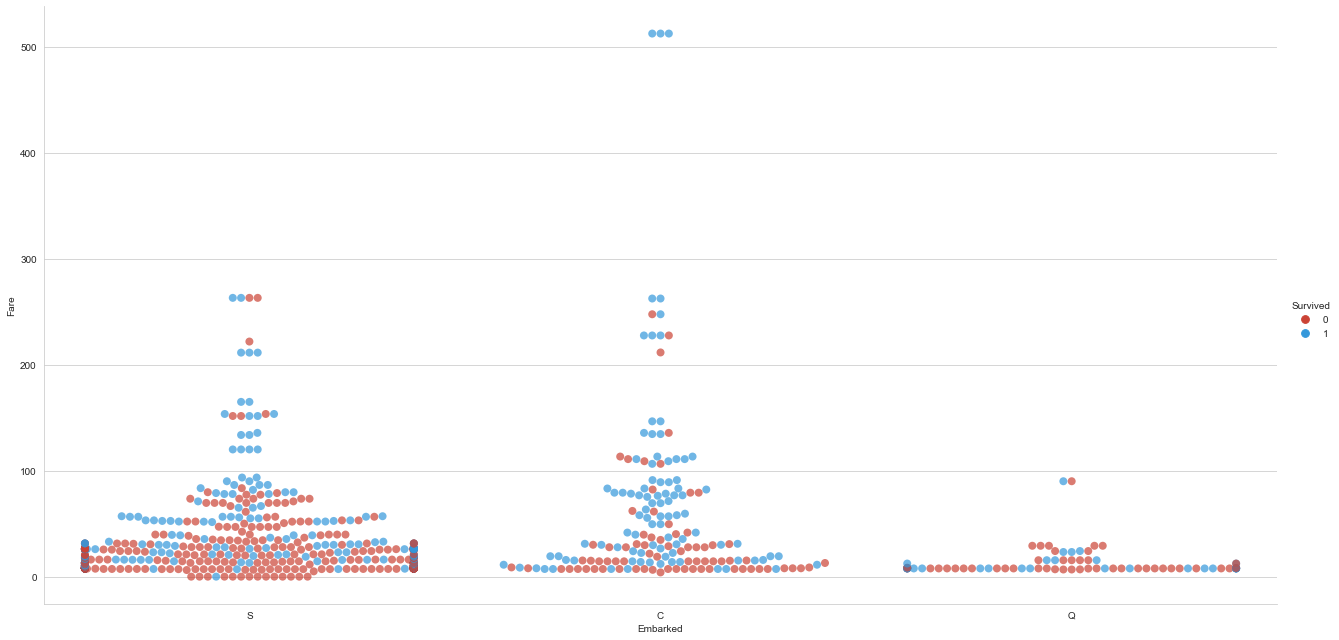

In [446]:
# fare-embarked ve survived grafik incelemesi
_ = sns.catplot(data=titanic, x='Embarked', y='Fare',  hue='Survived', palette=survive_palette,
                kind='swarm', height=9, aspect=2 , s=8, alpha=0.7)

- Embarked 3 farkli deger almis, Fare ve Survived degiskenlerine bagli olarak incelendi ancak herhangi bir iliski bulunamadi.
- Eksik veriler  en sik karsilasilan degerle doldurulabilir.

In [447]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

- Cabin degiskenini inceleyelim.

In [448]:
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- Cabin i gruplandirarak inceleyebiliriz.

In [449]:
# nan degerleri apply hata vermemesi icin string ifade ile doldurduk
titanic.Cabin = titanic.Cabin.fillna('None')

In [450]:
titanic['cabin_group'] = titanic.Cabin.apply(lambda x: x[0] if x!='None' else 'None')
titanic['cabin_group'].unique()

array(['None', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

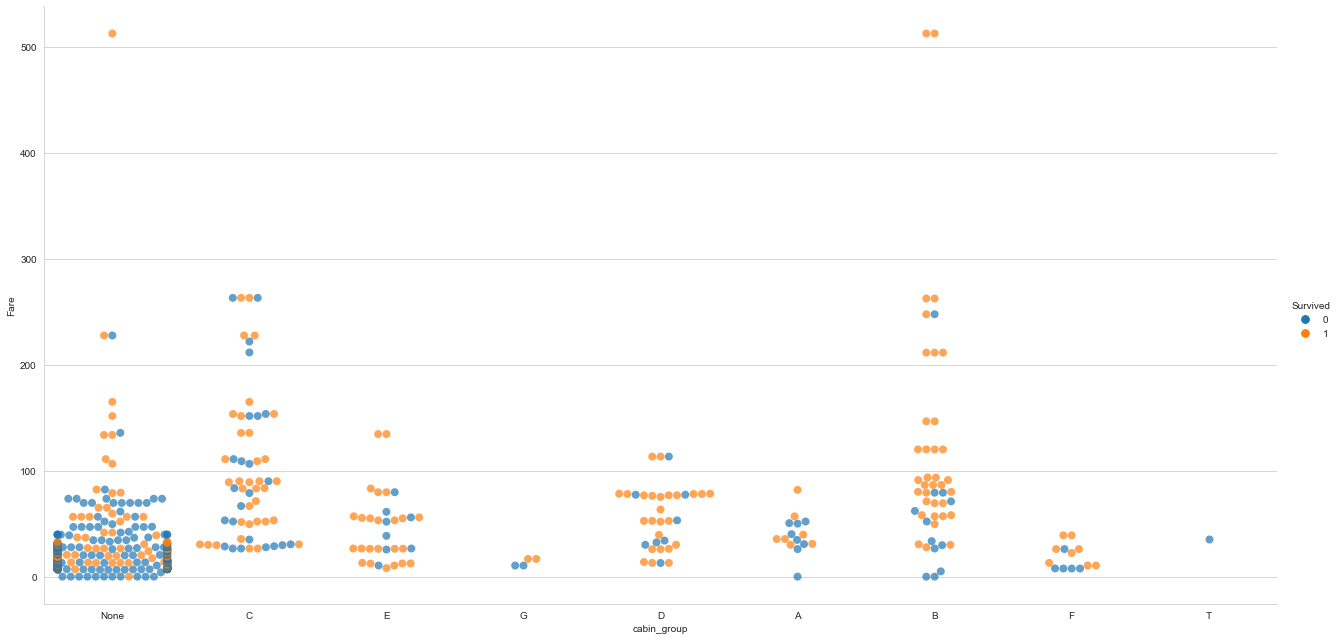

In [451]:
_ = sns.catplot(data=titanic, x='cabin_group', y='Fare', hue='Survived', 
               kind='swarm', height=9, aspect=2 , s=8, alpha=0.7)

- Cabin degiskenini doldurmak icin hicbir iliski bulamadik ve eksik degerler cok fazla.
- Cabin, Ticket degiskenleri numerik olmadigindan ve burada ihtiyacimiz olmadigindan cikarabiliriz.

In [452]:
titanic = titanic.drop(['Cabin','Ticket'], axis=1)

- Yas degiskeninin eksik degerleri tahmin ile doldurulacak.

### Aykiri Degerler

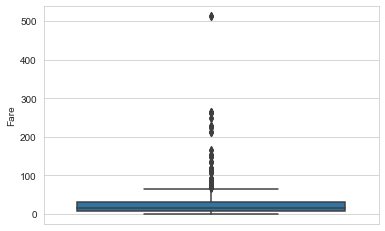

In [453]:
_ = sns.boxplot(data=titanic, y='Fare')

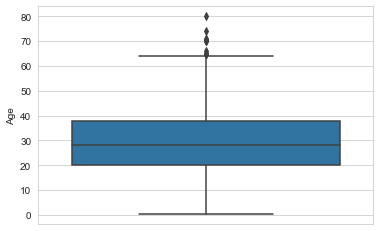

In [454]:
_ = sns.boxplot(data=titanic, y='Age')

- Aykiri degerleri gidermek yerine farkli degerler icin ayri ayri iki model olusturlabilir.

##### [Exploratory Data Analysis (EDA) Adimlari](#eda-adimlari)
---
## ***Degiskenlerin Analizi*** <a class="anchor" id="degiskenlerin-analizi"></a> 
### ***Tek degiskenli analiz***
#### Istatistiki Veriler

In [455]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


#### Surekli Degiskenlerin Gorsellestirilmesi

- pairplot

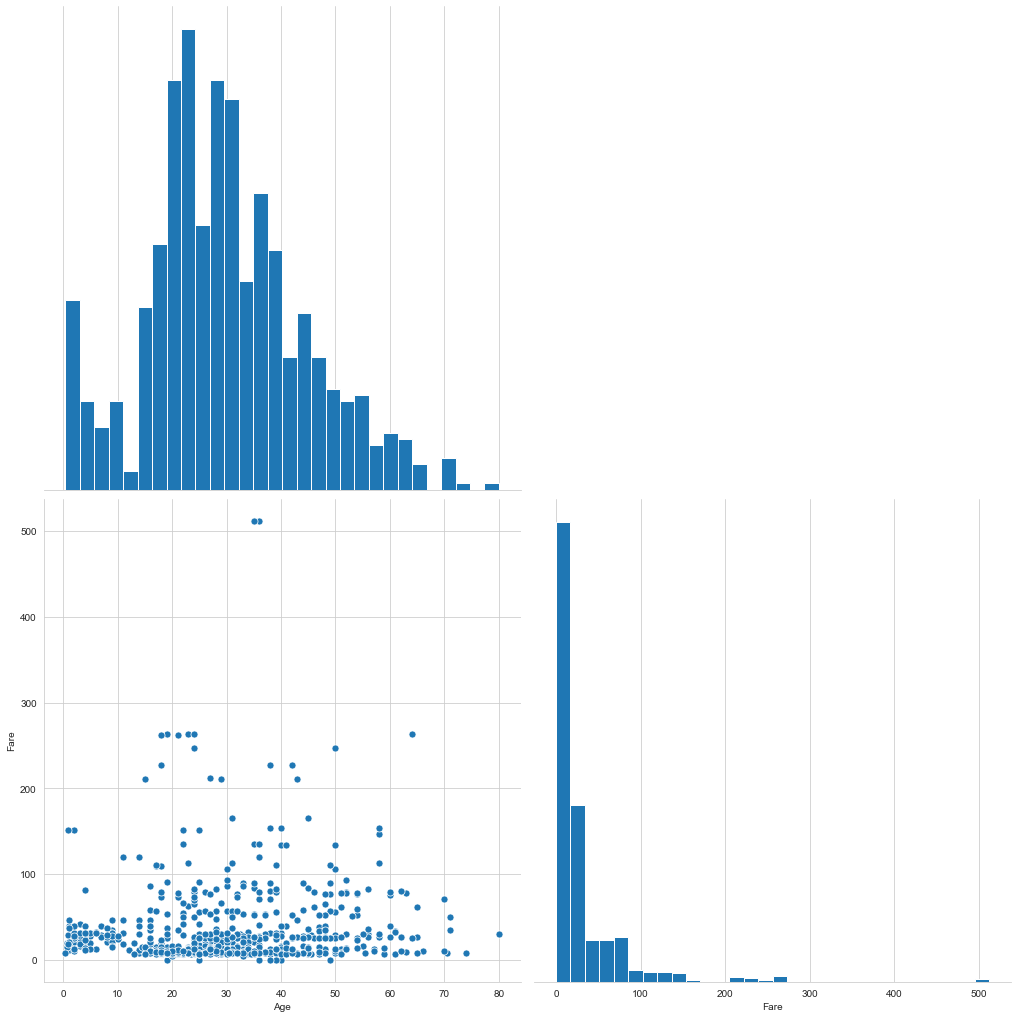

In [456]:
_ = sns.pairplot(titanic, vars=['Age','Fare'], height=7, diag_kws={'bins':30}, 
                 plot_kws={'s':50}, corner=True)

- melt-facetgrid-map-distplot

In [457]:
f= pd.melt(titanic, value_vars=['Age','Fare'])

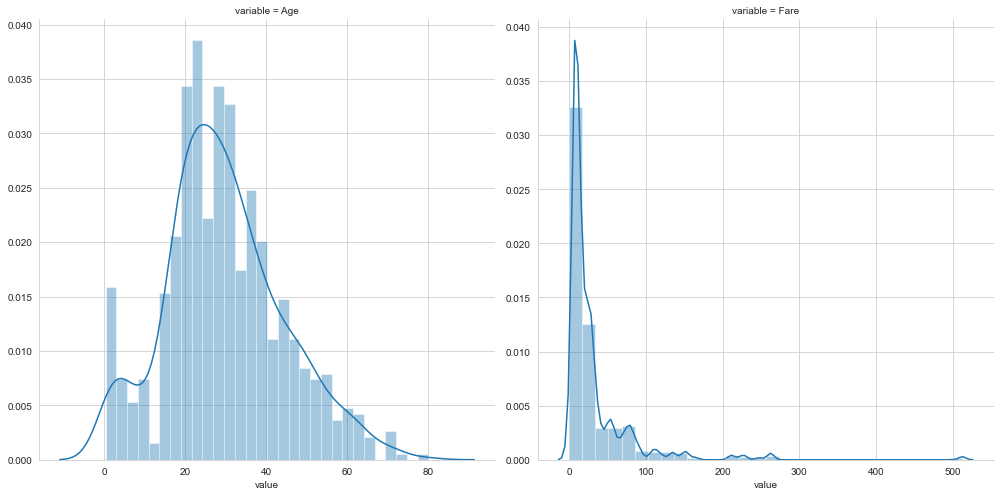

In [458]:
g = sns.FacetGrid(data=f, col='variable', col_wrap=2, sharex=False, sharey=False, height=7)
g = g.map(sns.distplot, 'value', kde=True, bins=30)

#### Kategorik Degiskenlerin Gorsellestirilmesi

- melt-facetgrid-map-countplot

In [459]:
categoric

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

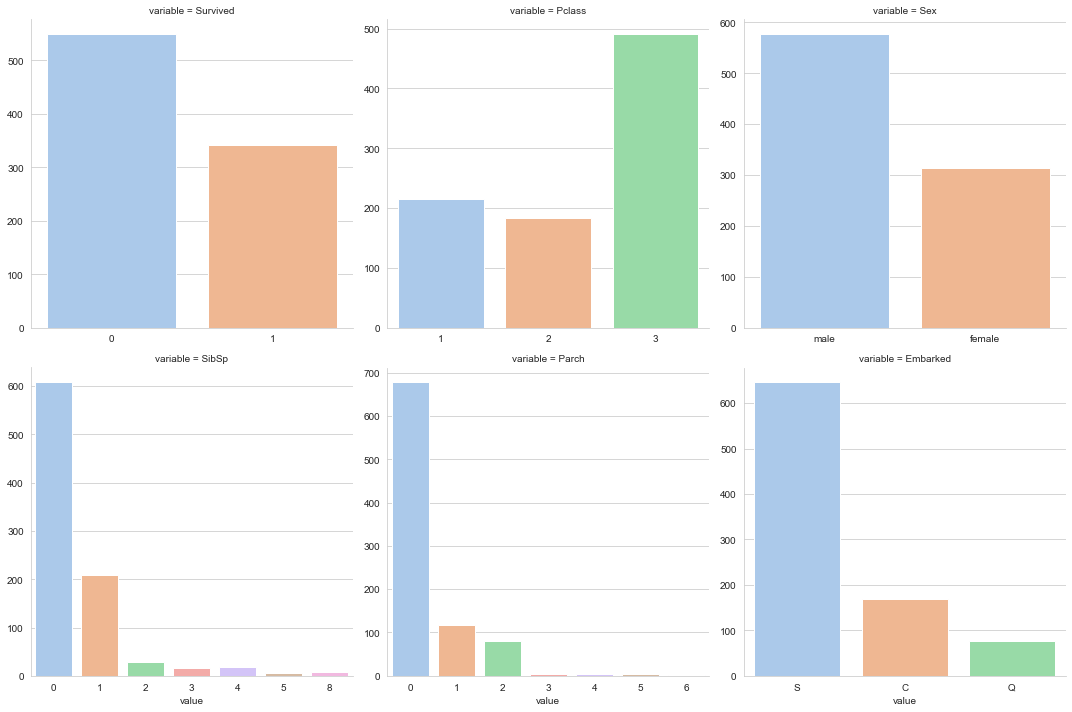

In [460]:
f = pd.melt(titanic, value_vars=categoric)
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.countplot,'value', palette=sns.color_palette('pastel')) 

### ***Cok degiskenli analiz***

#### Iki Surekli Degiskenin Iki Degiskenli Analizi
##### Dagilim Grafigi 
- scatterplot

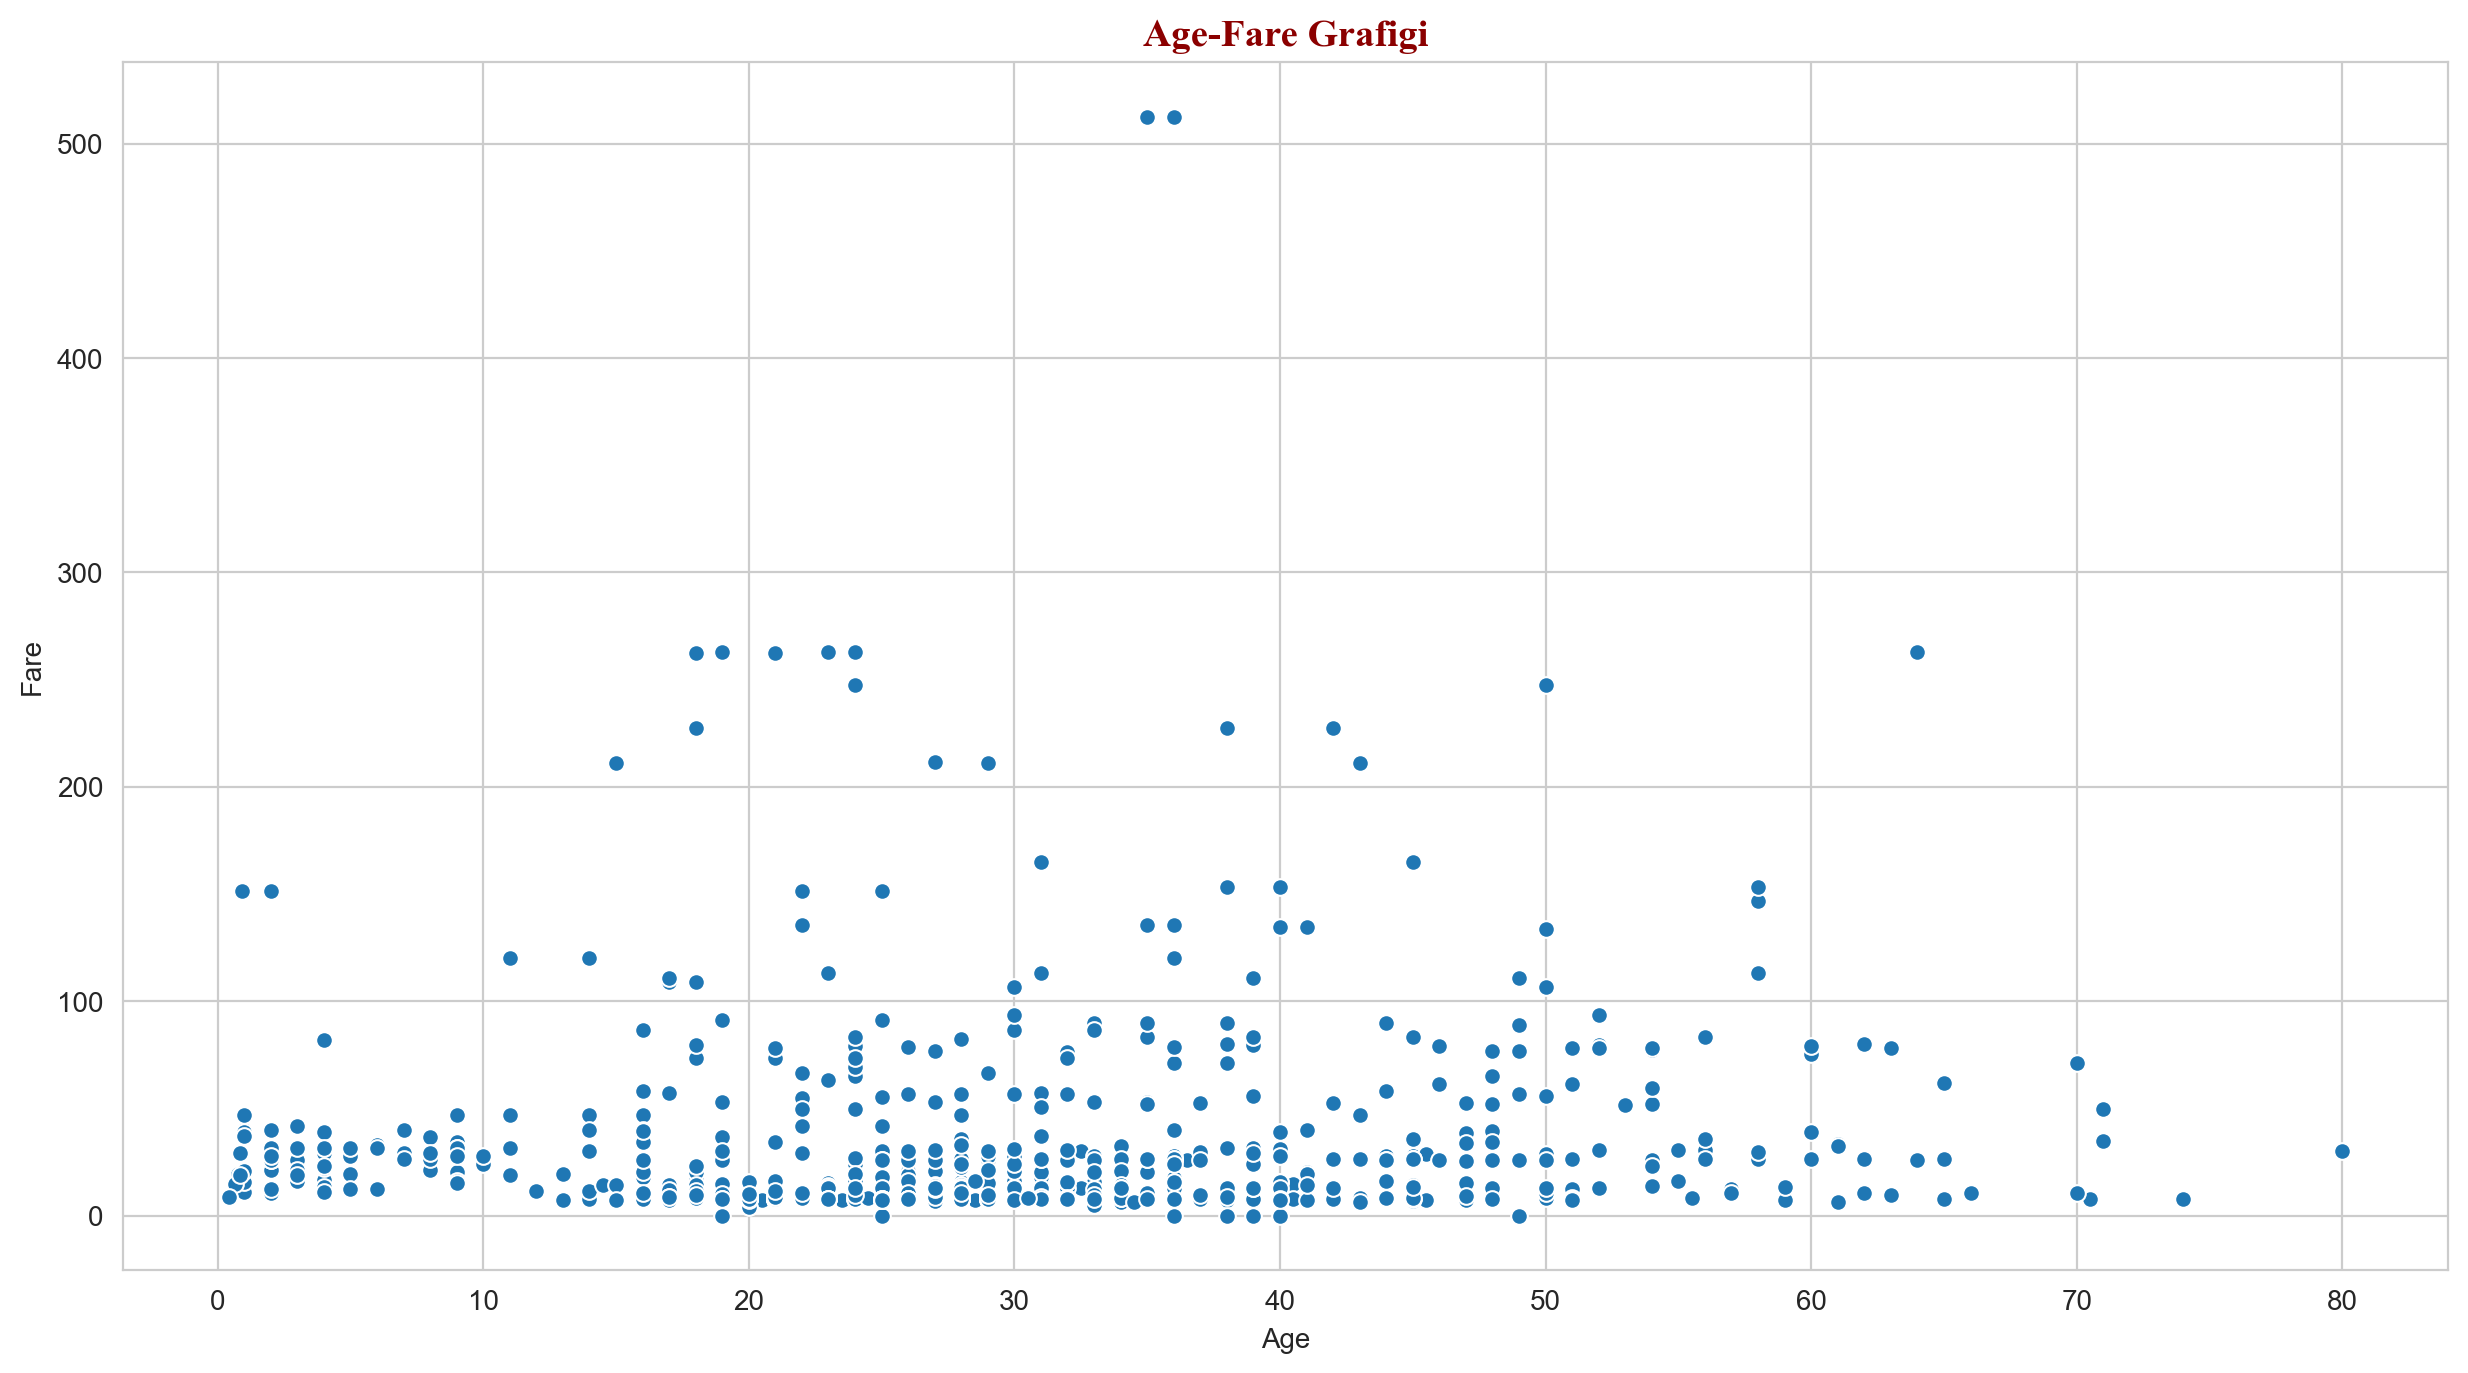

In [461]:
plt.figure(figsize=(15,8), dpi=200)
plt.title('Age-Fare Grafigi', fontdict=title_font)
_ = sns.scatterplot(data=titanic, x='Age', y='Fare')

##### Korelsayon Matrisi Grafigi 
- heatmap

In [462]:
# gereksiz surekli degiskenleri cikaralim
continuous.remove('PassengerId')
continuous.remove('Ticket')
continuous.remove('Cabin')
continuous.remove('Name')

In [463]:
corr_matrix = titanic[continuous].corr()
corr_matrix

,Age,Fare
Age,1.000,0.096
Fare,0.096,1.000


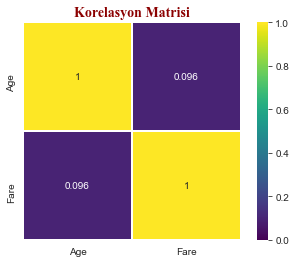

In [464]:
plt.title('Korelasyon Matrisi', fontdict=title_font)
_ = sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5,
vmin=0, vmax=1, cmap='viridis')

#### Iki Kategorik Degiskenin Iki Degiskenli Analizi
- countplot
- merkezde Survived olacak sekilde

In [465]:
f = pd.melt(titanic, id_vars='Survived', value_vars=['Sex', 'Pclass', 
                                                     'SibSp','Parch', 'Embarked'  ])

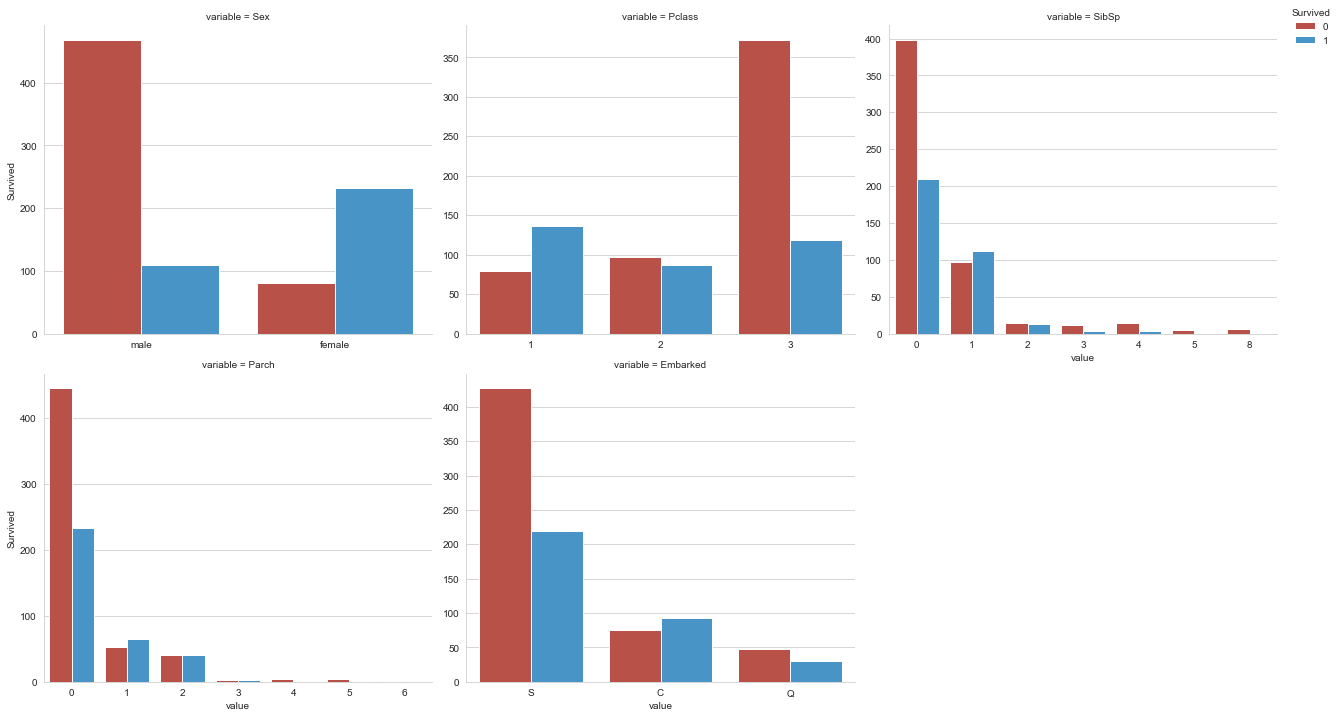

In [466]:
def countplot(value, hue, **kwargs):
    sns.countplot(x=value, hue=hue, palette=survive_palette)

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5, aspect=1.2)
g = g.map(countplot, "value", "Survived")
g = g.add_legend(title='Survived', loc='top')

#### Surekli ve Kategorik Degiskenin Iki Degiskenli Analizi
- Cubuk Grafigi (bar, swarm, strip, box plots)
    - Degiskenler: surekli(Fare, Age) kategorik(digerleri)

In [467]:
print(continuous, categoric)

['Age', 'Fare'] ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [468]:
f= pd.melt(titanic, id_vars=continuous, value_vars=categoric )

- Fare merkezde olacak sekilde.

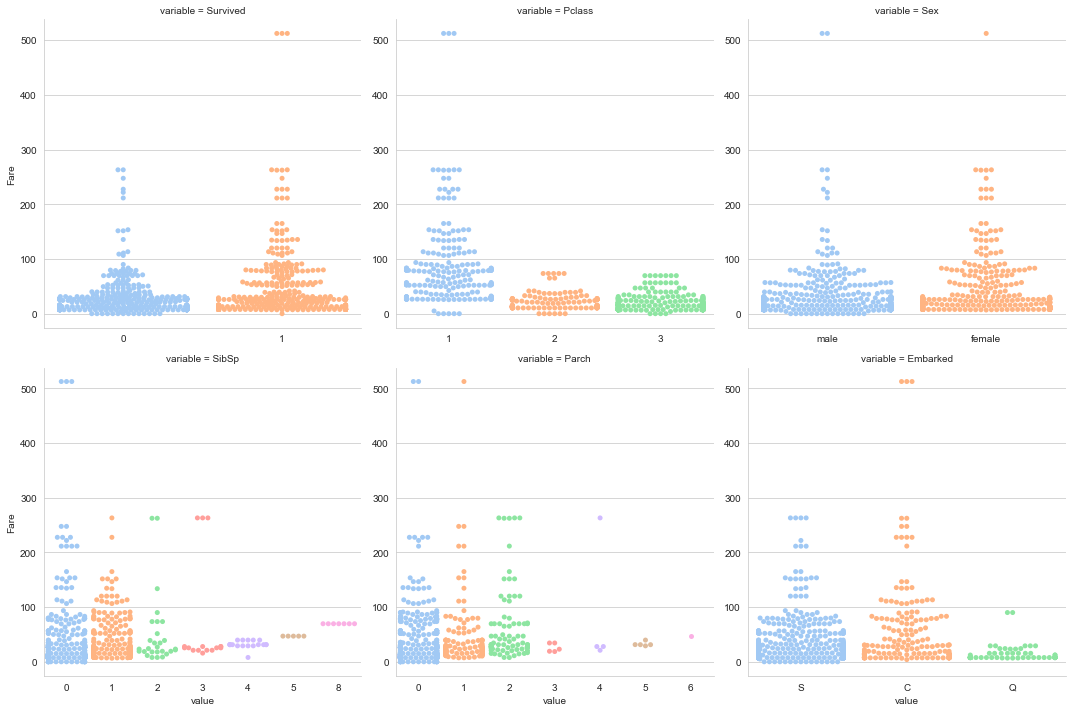

In [469]:
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.swarmplot,'value', 'Fare', palette=sns.color_palette('pastel'))

- Age merkezde olacak sekilde.

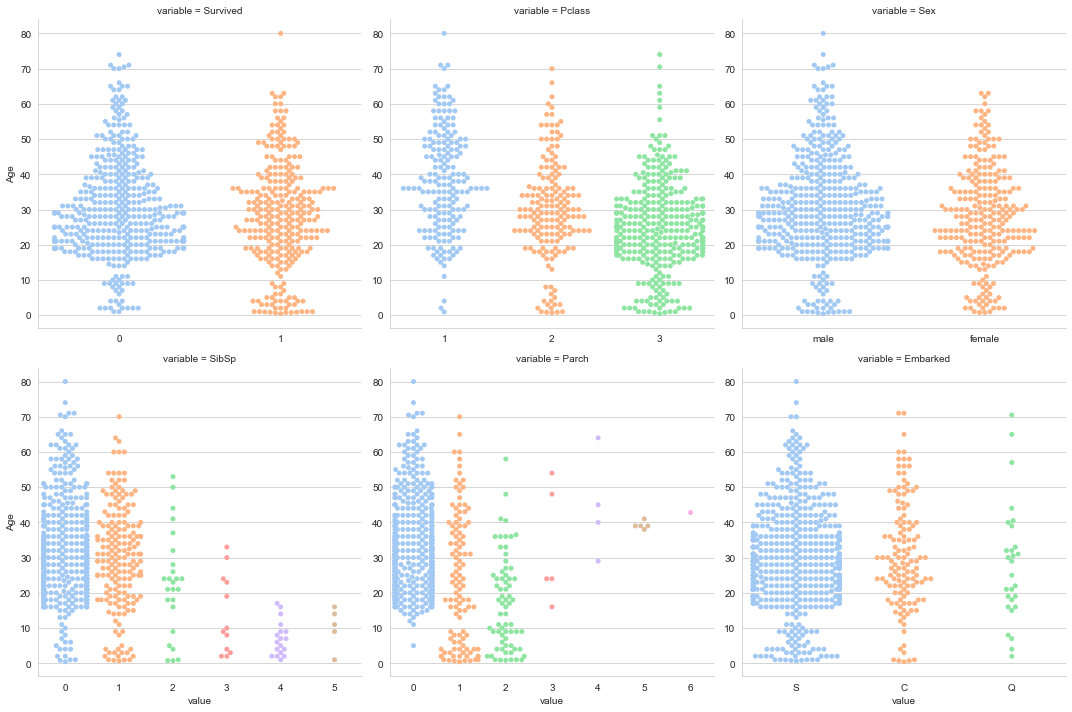

In [470]:
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.swarmplot,'value', 'Age', palette=sns.color_palette('pastel'))

#### Kategorik Hedef Degisken Merkezinde Surekli Degiskenlerin Analizi
- scatterplot (hue, style, size eklenerek farkli kategorik degiskenler de eklenebilir)

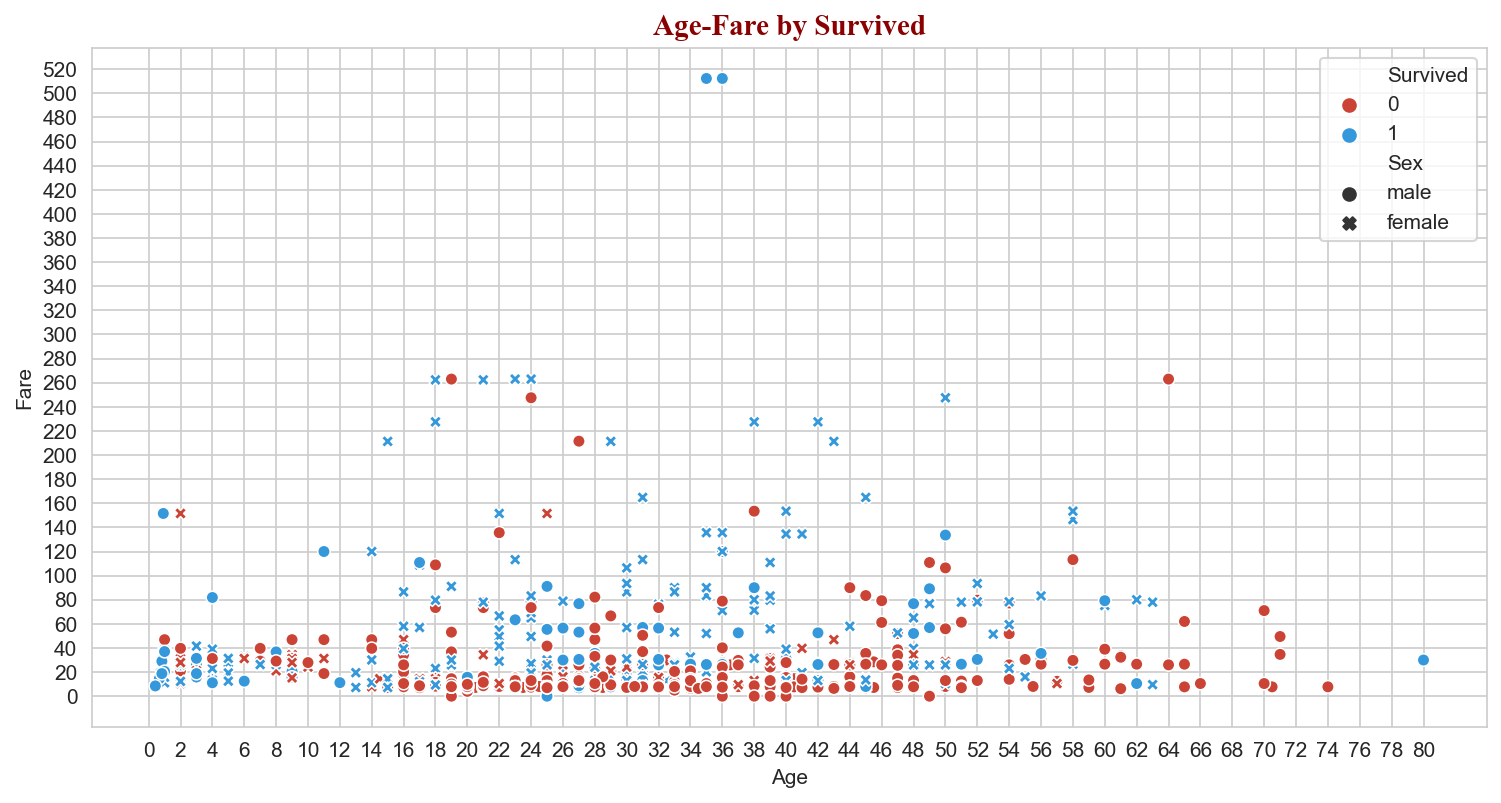

In [471]:
plt.figure(figsize=(12,6), dpi=150)
plt.yticks(ticks=np.arange(0,530,20))
plt.xticks(ticks=np.arange(0,81,2))
plt.title('Age-Fare by Survived', fontdict=title_font)
_ = sns.scatterplot(data=titanic, x='Age', y='Fare',style='Sex', 
                    hue='Survived', palette=survive_palette)

- Fare degiskeninin logu alinarak aykiri degerlerin etkisi azaltilabilir.

In [472]:
# fare degiskenindeki aykiri degerlerin etkisini azaltmak icin log u alinir
# sonsuz degerlerin olusmasini onlemek icin +1
titanic['fare_log']=np.log(titanic['Fare']+1)

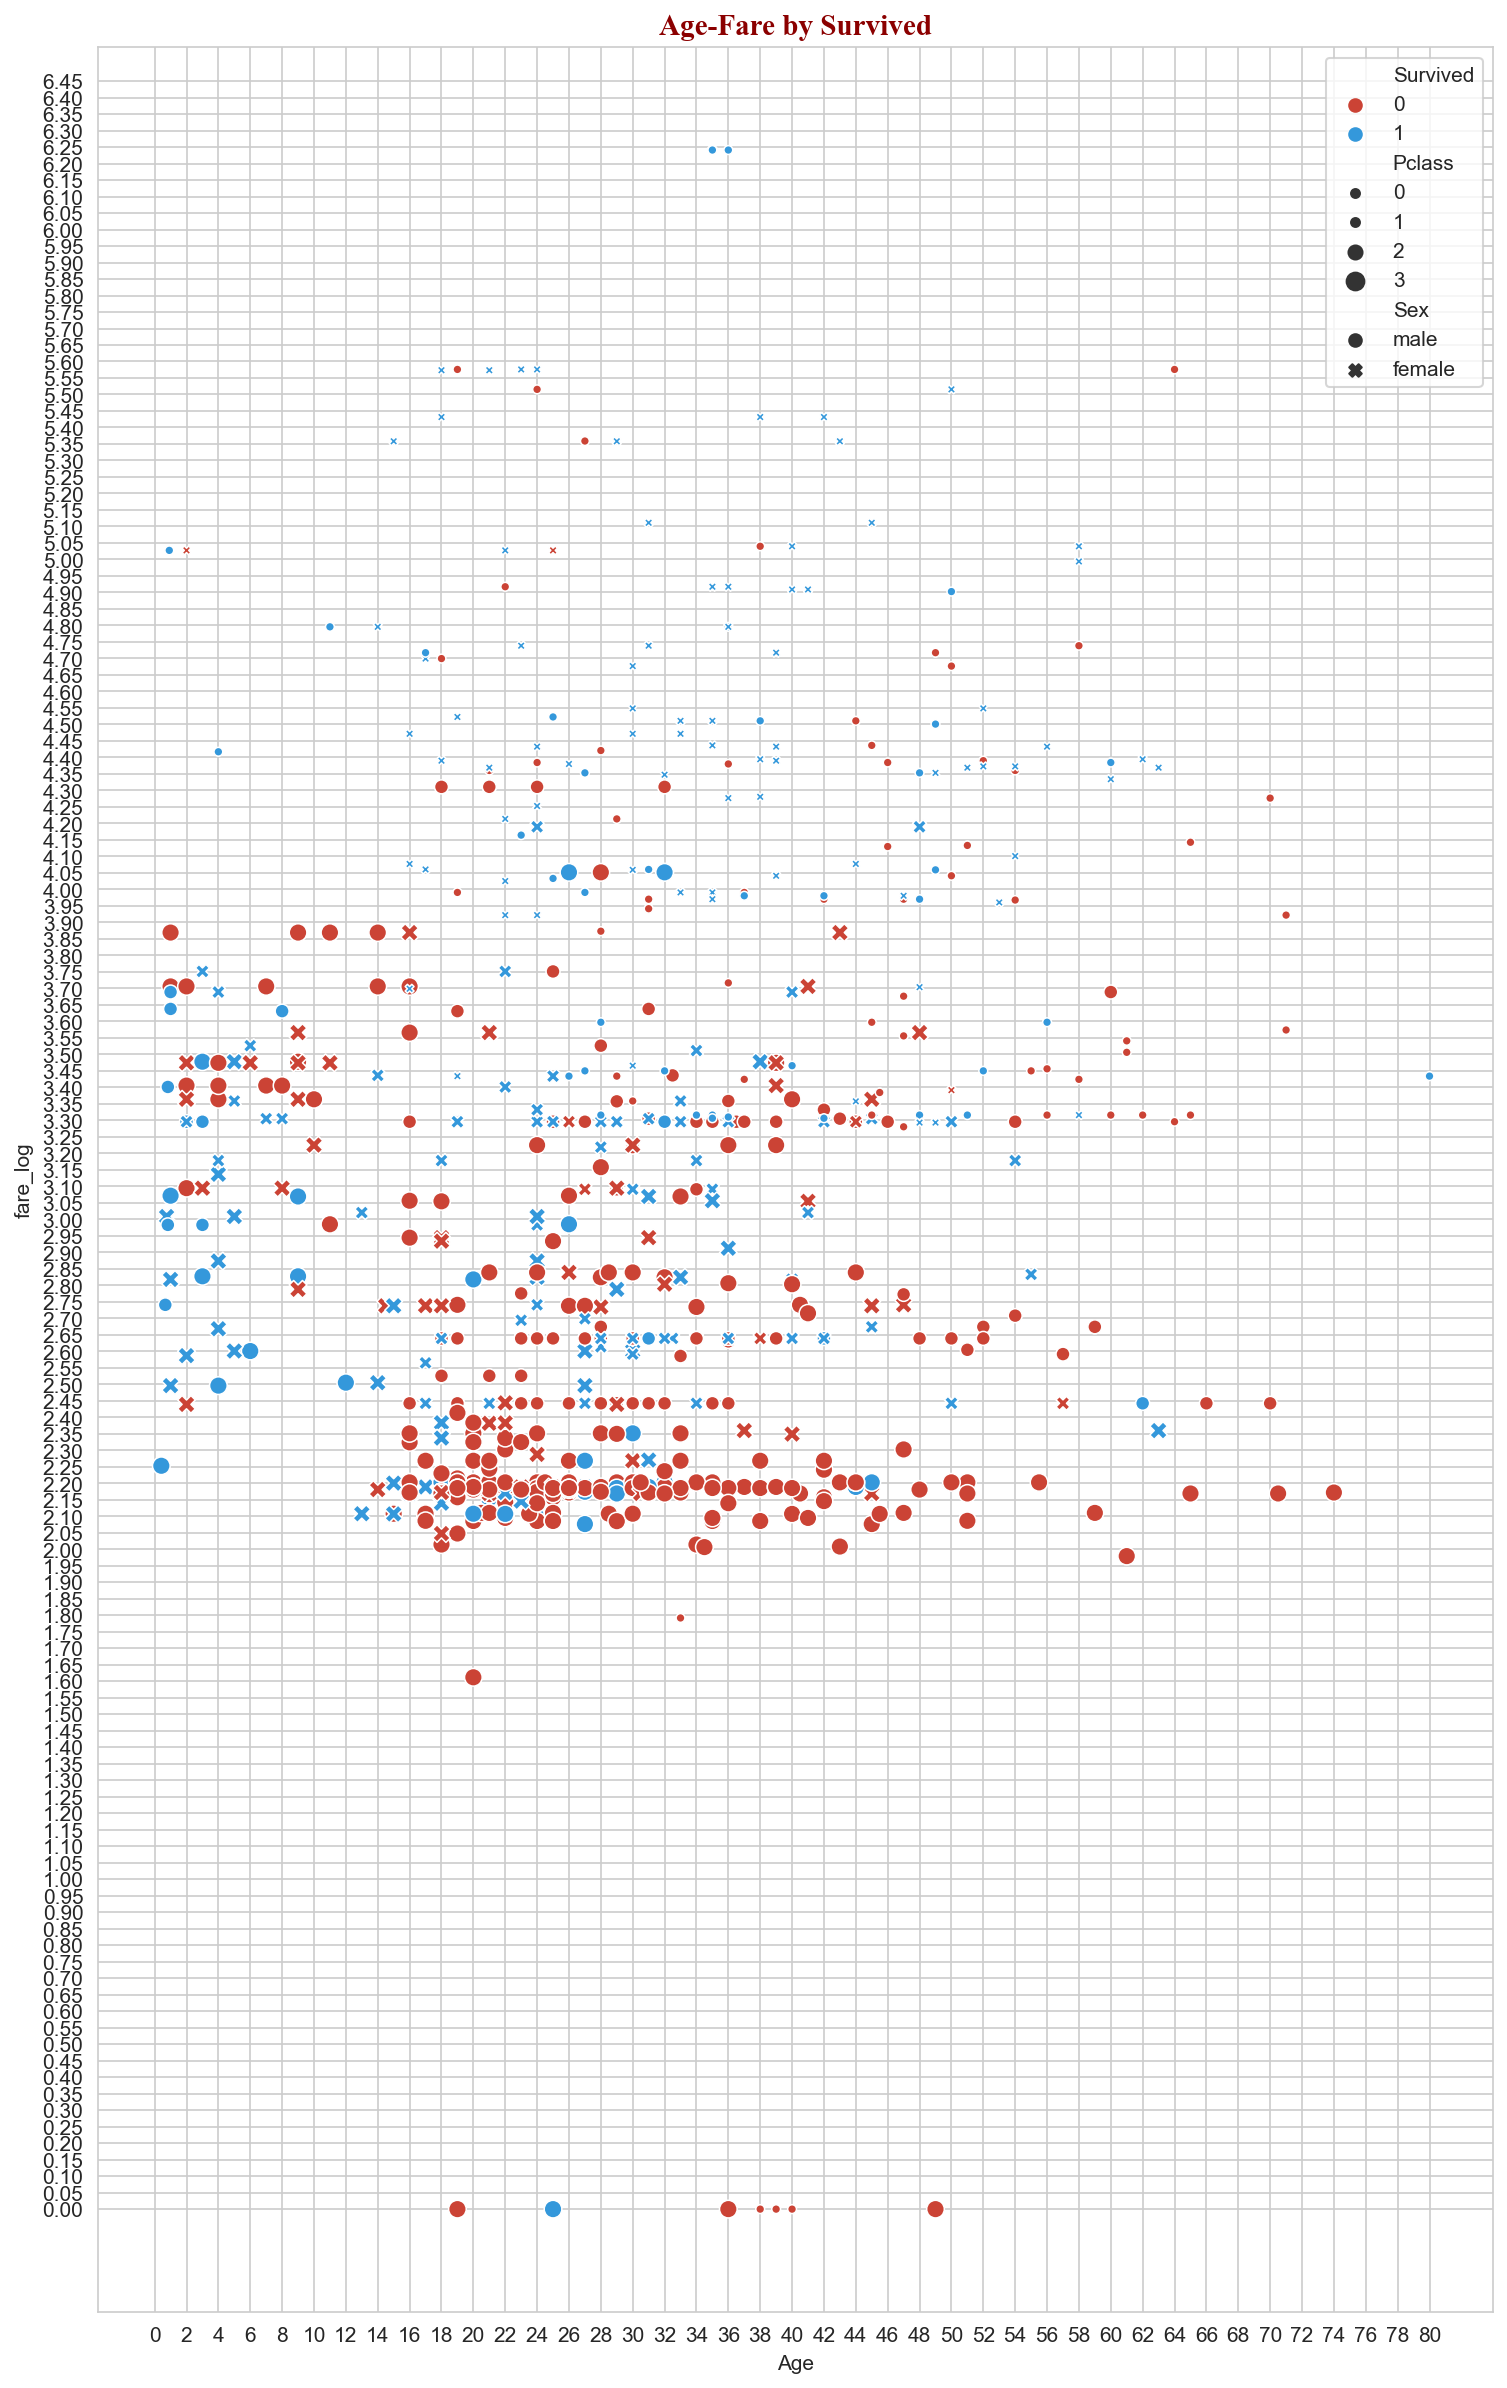

In [473]:
plt.figure(figsize=(12,20), dpi=150)
plt.yticks(ticks=np.arange(0,6.5,0.05))
plt.xticks(ticks=np.arange(0,81,2))
plt.title('Age-Fare by Survived', fontdict=title_font)
_ = sns.scatterplot(data=titanic, x='Age', y='fare_log',style='Sex', size='Pclass',
                    hue='Survived', palette=survive_palette)

- Yukaridaki grafige gore alinan gruplandirma kararlari:
    - Age 0-15(dahil), 15-54(dahil), 54-81
    - fare_log 0-2.45(dahil), 2.45-3.9(dahil), 3-9 ve uzeri 

##### [Exploratory Data Analysis (EDA) Adimlari](#eda-adimlari)
---
## ***Yeni Degiskenler Elde Etme*** <a class="anchor" id="yeni-degiskenler-elde-etme"></a>

***Yasi gruplandirma***

In [474]:
print('Yas\nmin : {}\nmax : {}'.format(titanic.Age.min(), titanic.Age.max()))

Yas
min : 0.42
max : 80.0


In [475]:
def group_age(age):
    if age<=15:
        return 0
    elif age<=54:
        return 1
    elif age<=81:
        return 2  

In [476]:
titanic['age_group'] = titanic['Age'].apply(group_age)

In [477]:
titanic.age_group.unique()

array([ 1., nan,  0.,  2.])

- yas grubu ve cinsiyete gore kurtulma sayilari

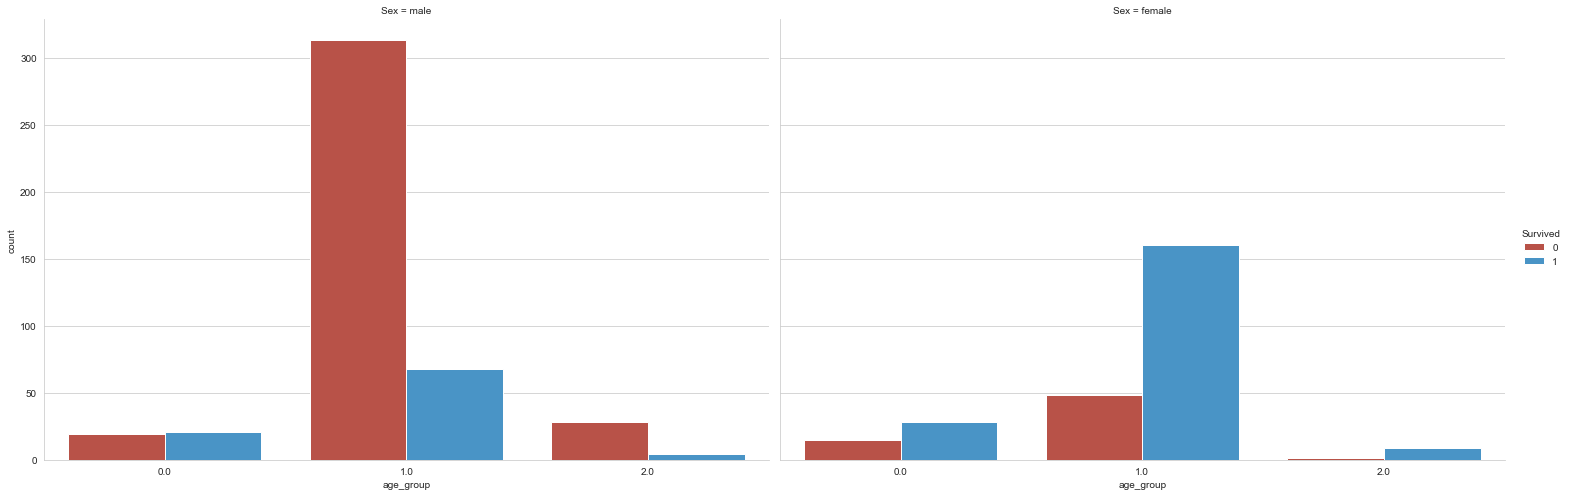

In [478]:
# yas grubu ve cinsiyete gore kurutlma sayilari
sns.set_style(style='whitegrid')

g = sns.catplot(data=titanic, x='age_group', kind='count', hue='Survived', 
                palette=survive_palette,
                col='Sex', col_wrap=2, height=7, aspect=1.5)

***Fare (fare_log) Degiskenini Gruplandirma***

In [479]:
print('Fare log\nmin : {}\nmax : {}'.format(titanic.fare_log.min(), titanic.fare_log.max()))

Fare log
min : 0.0
max : 6.240917354759096


In [480]:
def group_fare(fare):
    if fare<=2.45:
        return 0
    elif fare<=3.9:
        return 1
    elif fare<=7:
        return 2 

In [481]:
titanic['fare_group'] = titanic['fare_log'].apply(group_fare)

In [482]:
titanic.fare_group.unique()

array([0, 2, 1])

- ucret grubu ve cinsiyete gore kurtulma sayilari

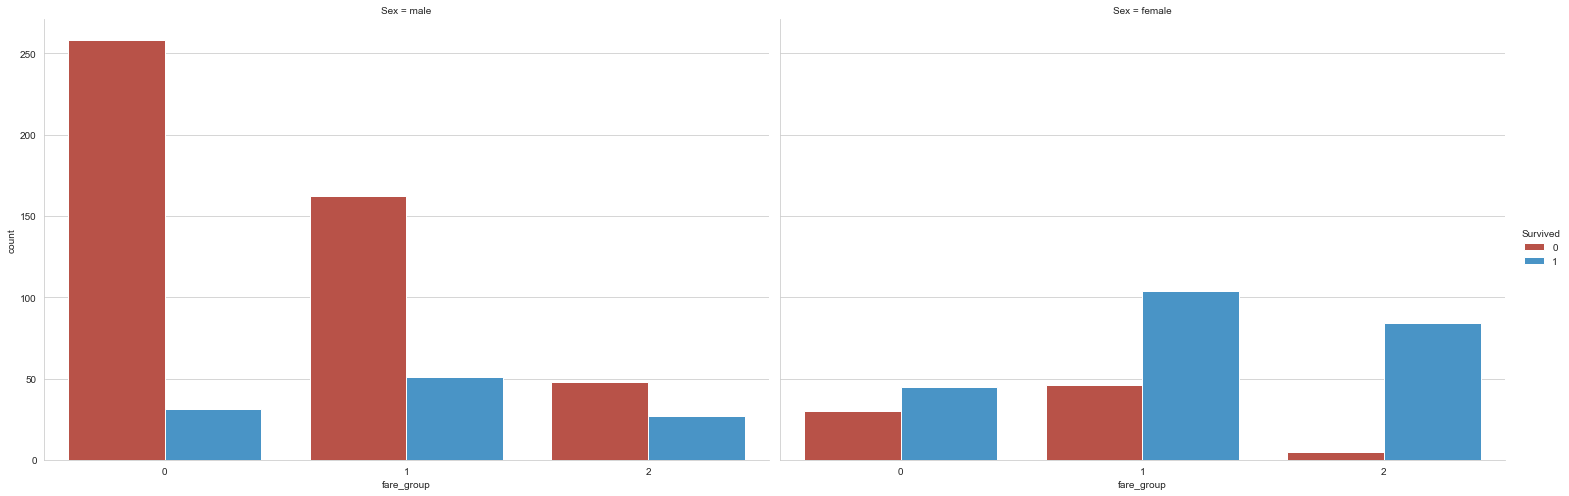

In [483]:
# yas grubu ve cinsiyete gore kurutlma sayilari
sns.set_style(style='whitegrid')

g = sns.catplot(data=titanic, x='fare_group', kind='count', hue='Survived', 
                palette=survive_palette,
                col='Sex', col_wrap=2, height=7, aspect=1.5)

***Title Bilgisi Ekleme***

- Name sutunundan title bilgisi extract edildi.

In [484]:
titanic.Name.head(10)

0                                Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [485]:
def add_title(col):
    if 'Mrs' in col:
        return 'mrs'
    elif 'Master' in col:
        return 'master'
    elif 'Mr' in col:
        return 'mr'
    elif 'Miss' in col:
        return 'miss'
    else:
        return 'no_title'

In [486]:
add_title('Fortune, Mr. Charles Alexander')

'mr'

In [487]:
titanic['title'] = titanic['Name'].apply(add_title)

In [488]:
titanic['title'].unique()

array(['mr', 'mrs', 'miss', 'master', 'no_title'], dtype=object)

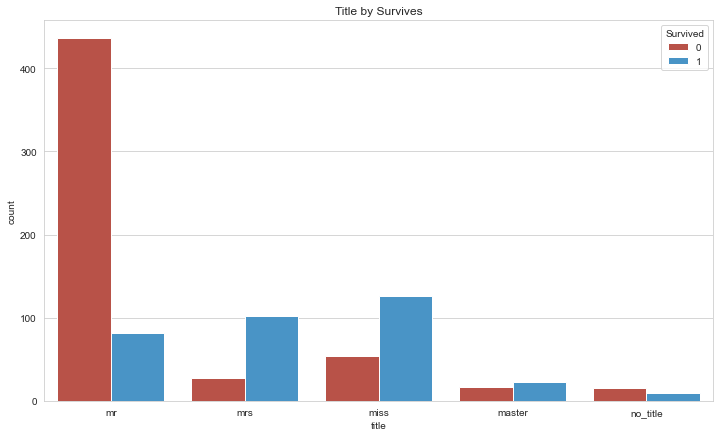

In [489]:
plt.figure(figsize=(12,7))
sns.countplot(data=titanic, x='title', hue='Survived', palette=survive_palette)
plt.title('Title by Survives')
plt.show()

In [490]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_group,fare_log,age_group,fare_group,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,7.250,S,None,2.110,1.000,0,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000,1,0,71.283,C,C,4.281,1.000,2,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,7.925,S,None,2.189,1.000,0,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,53.100,S,C,3.991,1.000,2,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,8.050,S,None,2.203,1.000,0,mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,13.000,S,None,2.639,1.000,1,no_title
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,30.000,S,B,3.434,1.000,1,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,23.450,S,None,3.197,nan,1,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,30.000,C,C,3.434,1.000,1,mr


##### [Exploratory Data Analysis (EDA) Adimlari](#eda-adimlari)
---
## ***Degiskenleri Donusturme*** <a class="anchor" id="degiskenleri-donusturme"></a>

***Cinsiyet, Liman ve Title bilgisi encode edilerek dahil edildi***

In [491]:
# get_dummies metodu ile encode edilir
titanic = pd.concat([titanic, pd.get_dummies(titanic.Sex, 
                                             drop_first=True, prefix='gender')], axis=1)
titanic = pd.concat([titanic, pd.get_dummies(titanic.Embarked, 
                                             drop_first=True, prefix='embarked')], axis=1)

titanic = pd.concat([titanic,pd.get_dummies(titanic['title'])], axis=1)

- Name, cabin_group, fare_log ile isimiz kalmadi.
- Encode edilenler de drop edilir.

In [492]:
# encode edilen ve gereksiz sutunlar drop edilir
titanic.drop(['Name', 'cabin_group', 'fare_log', 
              'Sex', 'Embarked',  'title', 'no_title'], axis=1, inplace=True)

In [493]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,age_group,fare_group,gender_male,embarked_Q,embarked_S,master,miss,mr,mrs
0,1,0,3,22.000,1,0,7.250,1.000,0,1,0,1,0,0,1,0
1,2,1,1,38.000,1,0,71.283,1.000,2,0,0,0,0,0,0,1
2,3,1,3,26.000,0,0,7.925,1.000,0,0,0,1,0,1,0,0
3,4,1,1,35.000,1,0,53.100,1.000,2,0,0,1,0,0,0,1
4,5,0,3,35.000,0,0,8.050,1.000,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000,0,0,13.000,1.000,1,1,0,1,0,0,0,0
887,888,1,1,19.000,0,0,30.000,1.000,1,0,0,1,0,1,0,0
888,889,0,3,nan,1,2,23.450,nan,1,0,0,1,0,1,0,0
889,890,1,1,26.000,0,0,30.000,1.000,1,1,0,0,0,0,1,0


In [494]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   age_group    714 non-null    float64
 8   fare_group   891 non-null    int64  
 9   gender_male  891 non-null    uint8  
 10  embarked_Q   891 non-null    uint8  
 11  embarked_S   891 non-null    uint8  
 12  master       891 non-null    uint8  
 13  miss         891 non-null    uint8  
 14  mr           891 non-null    uint8  
 15  mrs          891 non-null    uint8  
dtypes: float64(3), int64(6), uint8(7)
memory usage: 68.9 KB


##### [Exploratory Data Analysis (EDA) Adimlari](#eda-adimlari)
---
## ***Iki Senaryo ile Modele Hazirlik***

1. Age ve Fare surekli degiskenleri (age_group ve fare_group dahil degil) ile once Age surekli degiskeni tahmin ile doldur ve sonra Survived durmunu tahmin et.

2. age_group ve fare_group (Age ve Fare dahil degil) degiskenleri ile once kategorik age_group degiskenini tahminile doldur ve sonra Survived durmunu tahmin et.

In [495]:
# calismayi csv olarak kaydet
titanic.to_csv('data/titanic_clean.csv', index=False)